In [1]:
import numpy as np
import matplotlib.pyplot as plt
import sympy as sp

[0.  0.1 0.2 0.3 0.4 0.5]


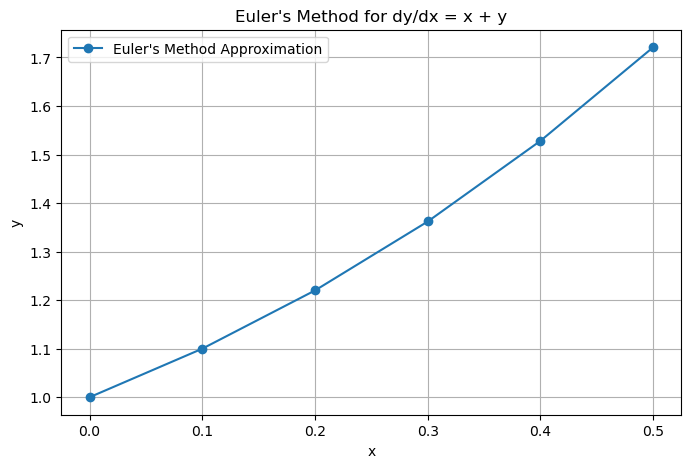

In [ ]:
def make_function(equation_str):
    x,y = sp.symbols('x y')

    expr = sp.simplify(equation_str)

    return expr

def euler_method(function, step_size, y_0, x_0, x_end):
    result = function.subs({"x": x_0, "y": y_0})

    x_values = np.arange(x_0, x_end+step_size, step_size)
    y_values=[y_0]

    print(x_values)

    for i in range(len(x_values)-1):
        y_value = y_values[i] + (step_size*function.subs({"x": x_values[i], "y": y_values[i]}))
        y_values.append(y_value)
    
    plot_euler(function, x_values,y_values)

def exact_solve(equation_str, x_0, x_end, y_0, step_size):
    # Define symbols
    x = sp.Symbol('x')
    y = sp.Function('y')

    # Convert string to sympy expression
    try:
        rhs = sp.sympify(equation_str)
    except (sp.SympifyError, ValueError):
        return "Invalid equation format."

    # Define the ODE dy/dx = rhs
    eq = sp.Eq(y(x).diff(x), rhs)

    # Solve the ODE
    solution = sp.dsolve(eq, y(x))

    # Solve for constant C using initial condition y(x_0) = y_0
    C = sp.Symbol('C')
    general_solution = solution.rhs
    constant_eq = general_solution.subs(x, x_0) - y_0
    constant_value = sp.solve(constant_eq, C)

    if not constant_value:
        return "Unable to determine the constant with given initial conditions."

    # Substitute the constant into the general solution
    particular_solution = general_solution.subs(C, constant_value[0])

    return particular_solution.simplify()

# Function to plot Euler's method results
def plot_euler(function, x_values, y_values):

    plt.figure(figsize=(8, 5))
    plt.plot(x_values, y_values, marker='o', linestyle='-', label="Euler's Method Approximation")
    plt.xlabel("x")
    plt.ylabel("y")
    plt.title(f"Euler's Method for dy/dx = {str(function)}")
    plt.legend()
    plt.grid(True)
    plt.show()

exact_solve("x+y", x_0=0, x_end=0.5, y_0=1,step_size = 0.1)

function=make_function("x+y")

euler_method(function=function, step_size = 0.1,y_0=1,x_0=0,x_end=0.5)


In [ ]:
# david's example



IndexError: list index out of range